In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# 1. Генерация Бернулли с параметром p
def bernoulli(p, size):
    y = np.random.uniform(0, 1, size)
    
    return (y < p).astype(int)

# 2. Генерация Биномиального распределения с параметрами n, p
def binomial(n, p, size):
    samples = np.zeros(size, dtype=int)
    for i in range(size):
        samples[i] = np.sum(np.random.uniform(0, 1, n) < p)
        
    return samples

# 3. Генерация Геометрического распределения с параметром p
def geometric(p, size):
    Y = np.random.uniform(0, 1, size)
    
    return np.floor(np.log(1 - Y) / np.log(1 - p)).astype(int) + 1

# 4. Генерация Пуассоновского распределения с параметром lam
def poisson(lam, size):
    samples = np.zeros(size, dtype=int)
    for i in range(size):
        L = np.exp(-lam)
        p = 1.0
        k = 0
        while p > L:
            k += 1
            p *= np.random.uniform(0, 1)
        samples[i] = k - 1
        
    return samples

# 5. Генерация Равномерного распределения на [a, b]
def uniform(a, b, size):
    y = np.random.uniform(0, 1, size)
    
    return a + (b - a) * y

# 6. Генерация Показательного распределения с параметром alpha
def exponential(alpha, size):
    y = np.random.uniform(0, 1, size)
    
    return -np.log(1 - y) / alpha

# 7. Генерация Лапласовского распределения с параметром alpha
def laplace(alpha, size):
    y = np.random.uniform(0, 1, size)
    
    return alpha * np.sign(y - 0.5) * np.log(1 - 2 * np.abs(y - 0.5))

# 8. Генерация Нормального распределения с параметрами a и sigma
def normal(a, sigma, size):
    u1 = np.random.uniform(0, 1, size)
    u2 = np.random.uniform(0, 1, size)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    
    return a + sigma * z0

# 9. Генерация распределения Коши
def cauchy(size):
    y = np.random.uniform(0, 1, size)
    
    return np.tan(np.pi * (y - 0.5))

# 10. Генерация распределения с ядром f(t) = 1/t^3 для t > 1
def custom_distribution(size):
    y = np.random.uniform(0, 1, size)
    
    return (1 / y) ** (1 / 3)

def plot_histogram(data, bins=30, title='Histogram', density=True, xlabel='x', ylabel='Density'):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, density=density, alpha=0.75, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

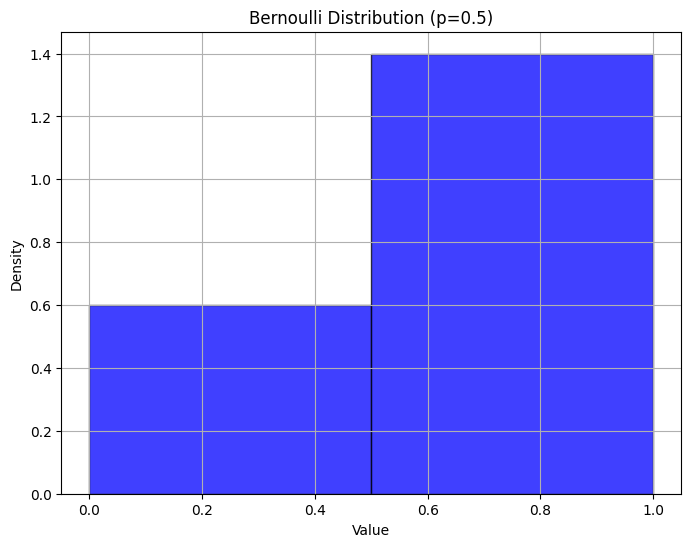

In [40]:
bernoulli_data = bernoulli(0.7, 10000)
plot_histogram(bernoulli_data, bins=2, title="Bernoulli Distribution (p=0.5)", xlabel="Value", ylabel="Density")

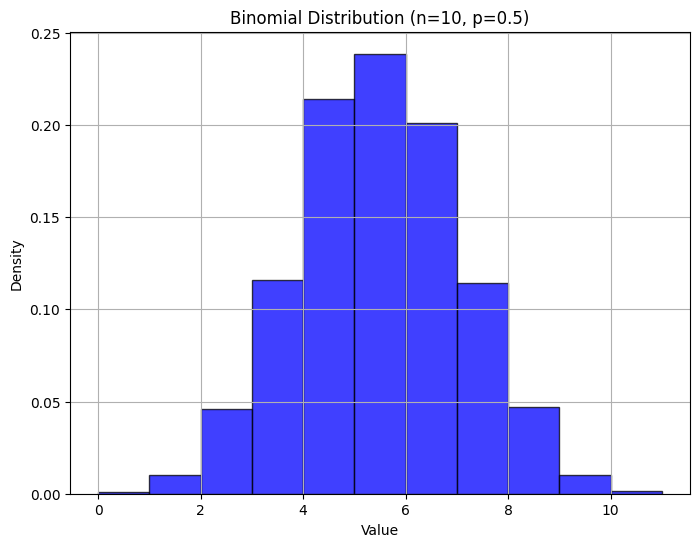

In [41]:
# Биномиальное (n=10, p=0.5)
binomial_data = binomial(10, 0.5, 10000)
plot_histogram(binomial_data, bins=range(12), title="Binomial Distribution (n=10, p=0.5)", xlabel="Value", ylabel="Density")

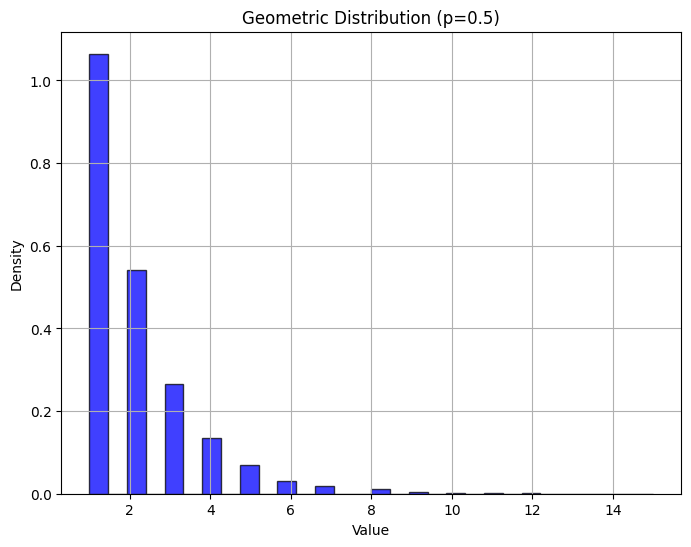

In [42]:
geometric_data = geometric(0.5, 10000)
plot_histogram(geometric_data, bins=30, title="Geometric Distribution (p=0.5)", xlabel="Value", ylabel="Density")

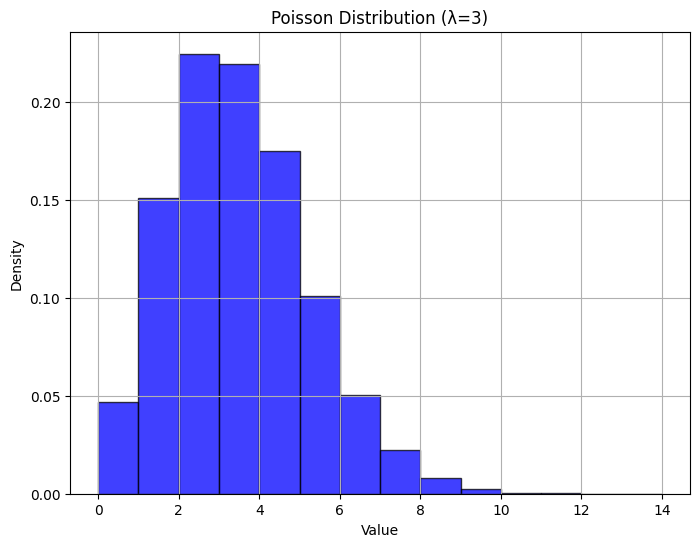

In [43]:
poisson_data = poisson(3, 10000)
plot_histogram(poisson_data, bins=range(15), title="Poisson Distribution (λ=3)", xlabel="Value", ylabel="Density")

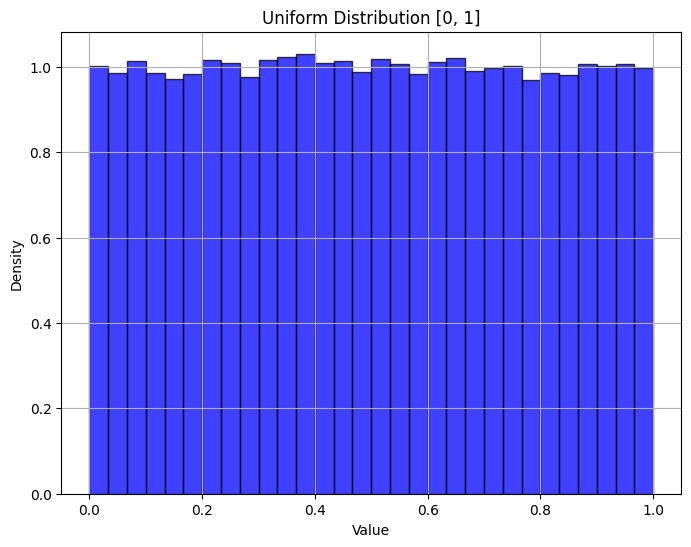

In [44]:
uniform_data = uniform(0, 1, 100000)
plot_histogram(uniform_data, bins=30, title="Uniform Distribution [0, 1]", xlabel="Value", ylabel="Density")

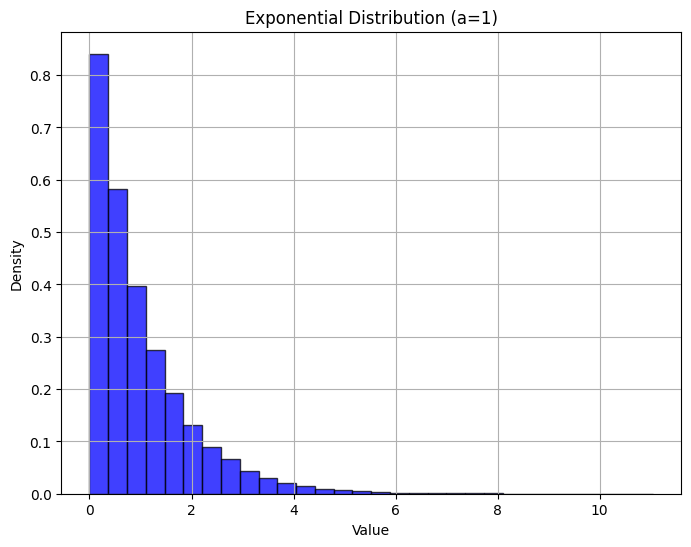

In [45]:
exponential_data = exponential(1, 100000)
plot_histogram(exponential_data, bins=30, title="Exponential Distribution (a=1)", xlabel="Value", ylabel="Density")

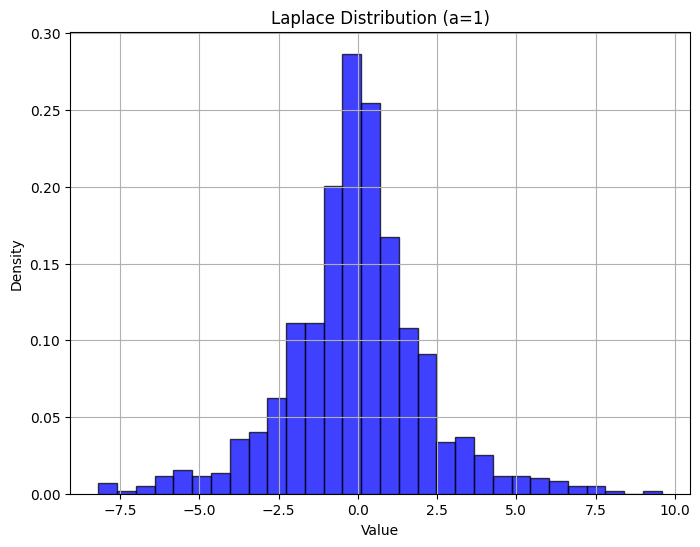

In [5]:
laplace_data = laplace(1.6, 1000)
plot_histogram(laplace_data, bins=30, title="Laplace Distribution (a=1)", xlabel="Value", ylabel="Density")

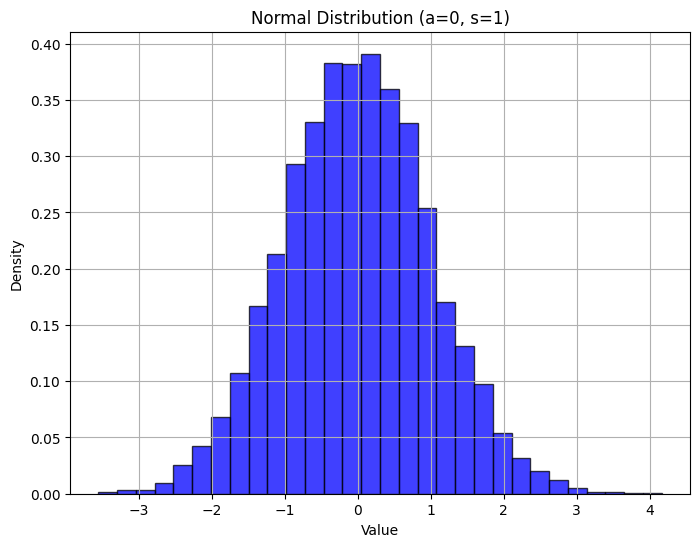

In [47]:
normal_data = normal(0, 1, 10000)
plot_histogram(normal_data, bins=30, title="Normal Distribution (a=0, s=1)", xlabel="Value", ylabel="Density")

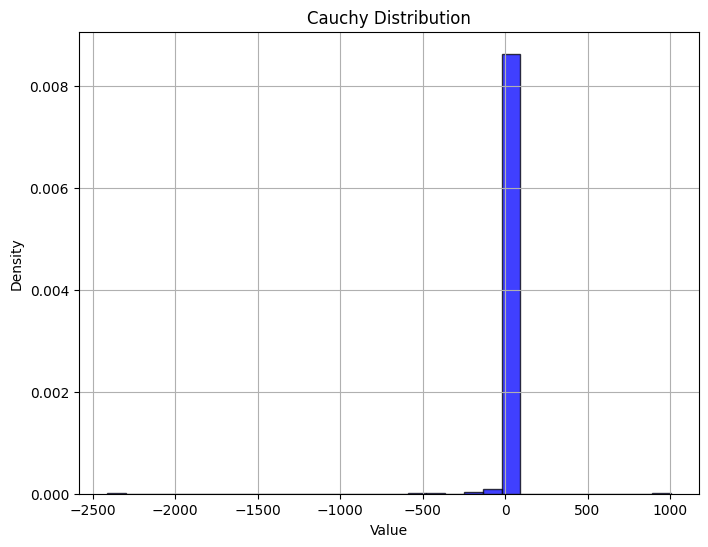

In [48]:
cauchy_data = cauchy(1000)
plot_histogram(cauchy_data, bins=30, title="Cauchy Distribution", xlabel="Value", ylabel="Density")

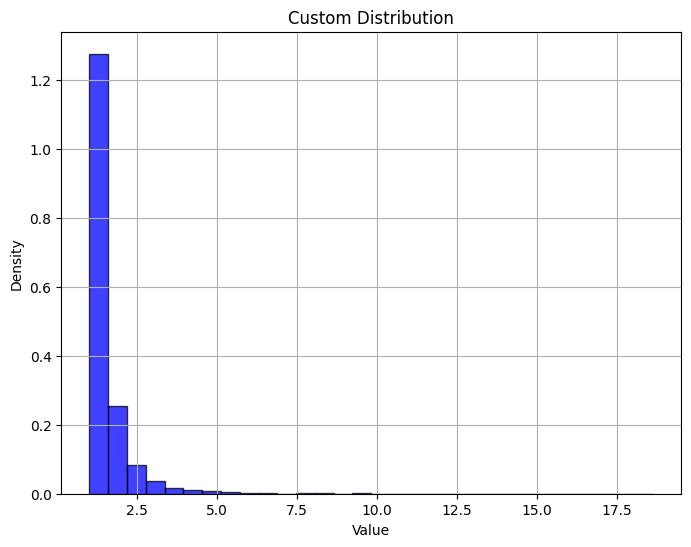

In [49]:
custom_data = custom_distribution(10000)
plot_histogram(custom_data, bins=30, title="Custom Distribution", xlabel="Value", ylabel="Density")


In [6]:
# 1. Гамма-распределение с параметрами k и θ
def gamma_distribution(k, theta, size=1000):
    return np.random.gamma(k, theta, size)

# 2. Бета-распределение с параметрами α и β
def beta_distribution(alpha, beta, size=1000):
    return np.random.beta(alpha, beta, size)

def calc_skewness(X):
    mean_X = np.mean(X)
    std_X = np.std(X)
    
    skew = np.mean((X - mean_X)**3) / std_X**3
    return skew

def calc_excess(X):
    mean_X = np.mean(X)
    std_X = np.std(X)
    
    kurt = np.mean((X - mean_X)**4) / std_X**4 - 3
    return kurt

# Функция для вычисления и отображения асимметрии и эксцесса
def compute_and_plot_distribution_stats(data, dist_name):
    # Вычисляем асимметрию
    skewness = calc_skewness(data)
    excess = calc_excess(data)  # Экцесс
    print(f"{dist_name} - Aсимметрия: {skewness:.3f}, Эксцесс: {excess:.3f}")
    
    # Построение гистограммы
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, density=True, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f"{dist_name} Distribution (Skewness={skewness:.3f}, Kurtosis={excess:.3f})")
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

Gamma(k=1, θ=1) - Aсимметрия: 1.894, Эксцесс: 4.953


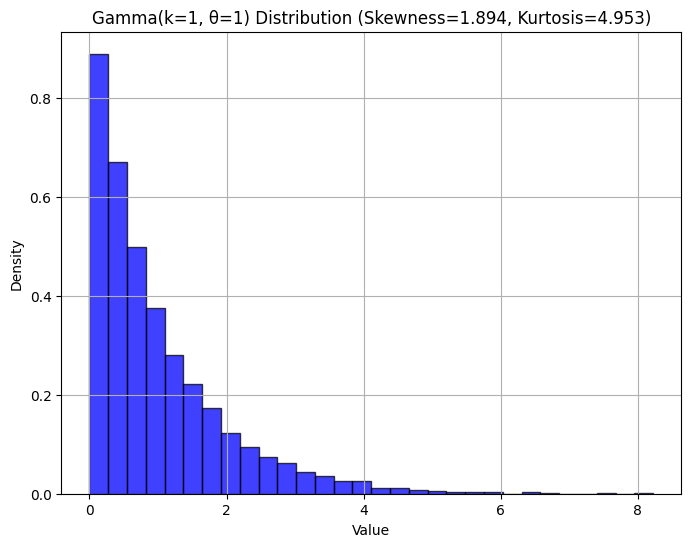

Gamma(k=1, θ=2) - Aсимметрия: 2.018, Эксцесс: 6.084


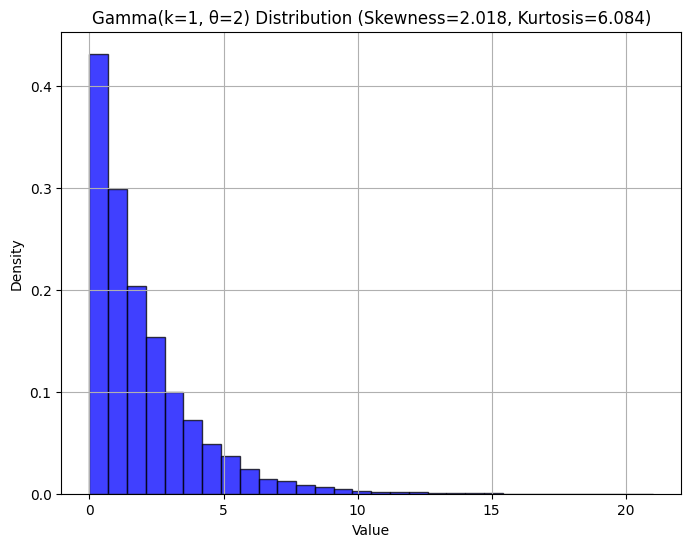

Gamma(k=2, θ=1) - Aсимметрия: 1.415, Эксцесс: 3.208


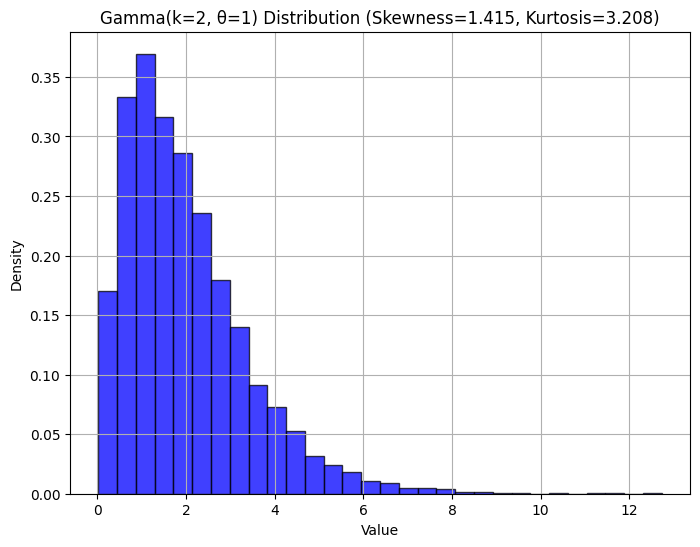

Gamma(k=2, θ=2) - Aсимметрия: 1.326, Эксцесс: 2.448


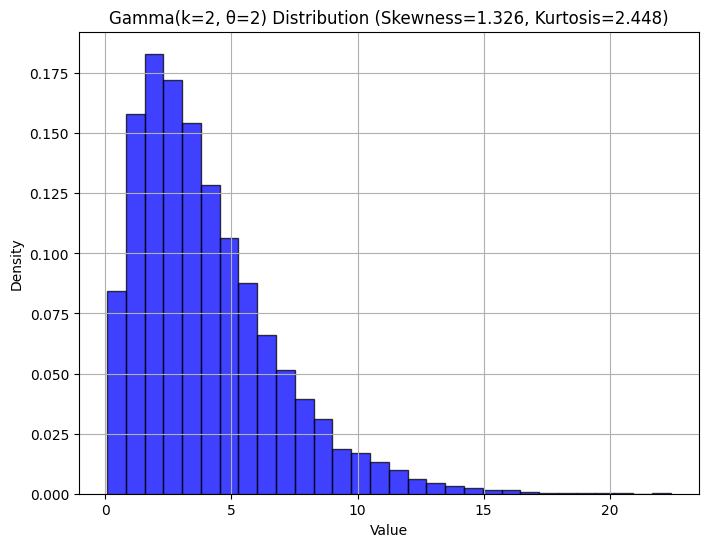

In [51]:
# Исследование гамма-распределения с разными параметрами
gamma_k_values = [1, 2]
gamma_theta_values = [1, 2]

for k in gamma_k_values:
    for theta in gamma_theta_values:
        gamma_data = gamma_distribution(k, theta, 10000)
        compute_and_plot_distribution_stats(gamma_data, f"Gamma(k={k}, teta={theta})")

Beta(α=0.5, β=0.5) - Aсимметрия: -0.017, Эксцесс: -1.510


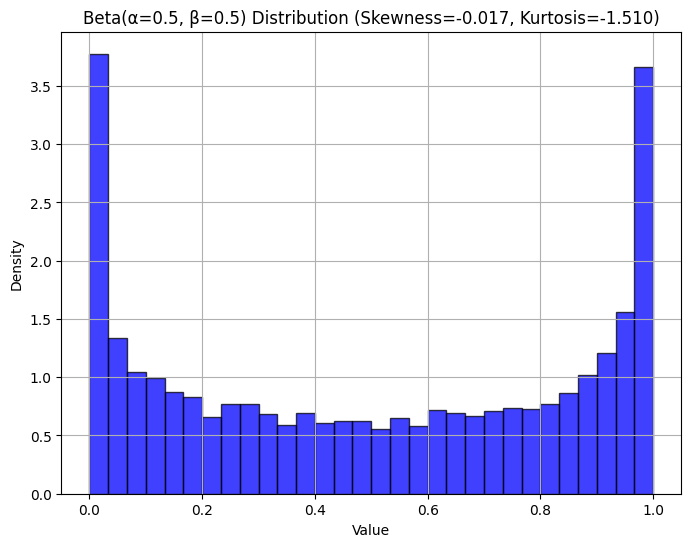

Beta(α=0.5, β=1) - Aсимметрия: 0.658, Эксцесс: -0.836


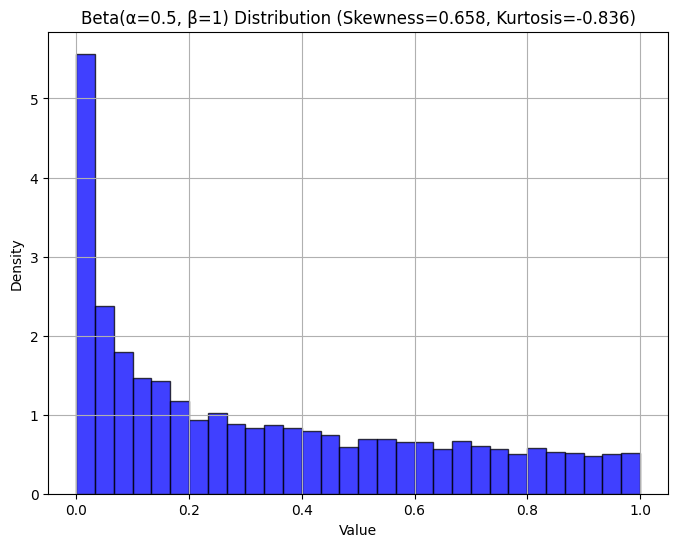

Beta(α=2, β=0.5) - Aсимметрия: -1.290, Эксцесс: 0.988


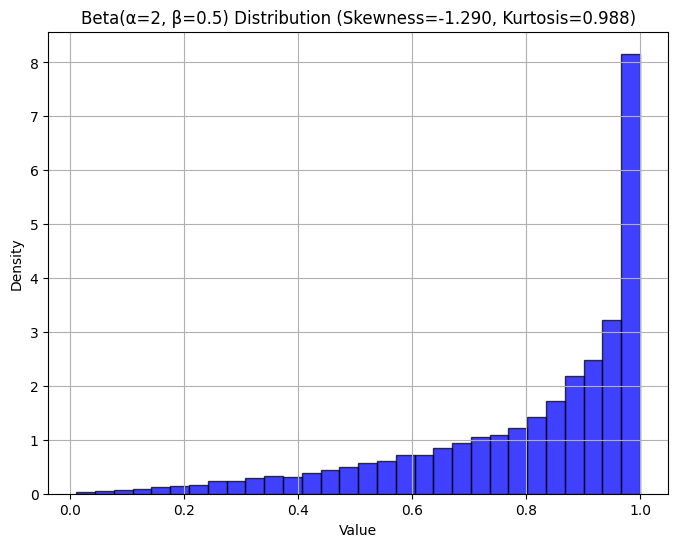

Beta(α=2, β=1) - Aсимметрия: -0.586, Эксцесс: -0.546


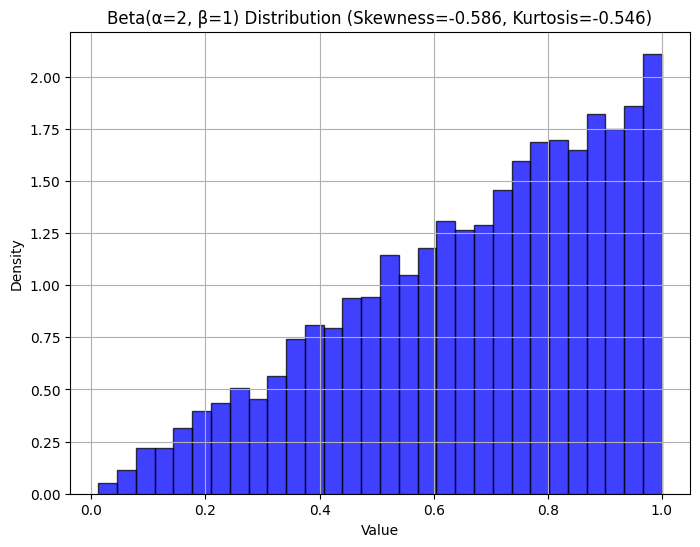

In [52]:
# Исследование бета-распределения
beta_alpha_values = [0.5, 2]
beta_beta_values = [0.5, 1]

for alpha in beta_alpha_values:
    for beta_param in beta_beta_values:
        beta_data = beta_distribution(alpha, beta_param, 10000)
        compute_and_plot_distribution_stats(beta_data, f"Beta(a={alpha}, b={beta_param})")

Bernoulli(p=0.5) - Aсимметрия: 0.010, Эксцесс: -2.000


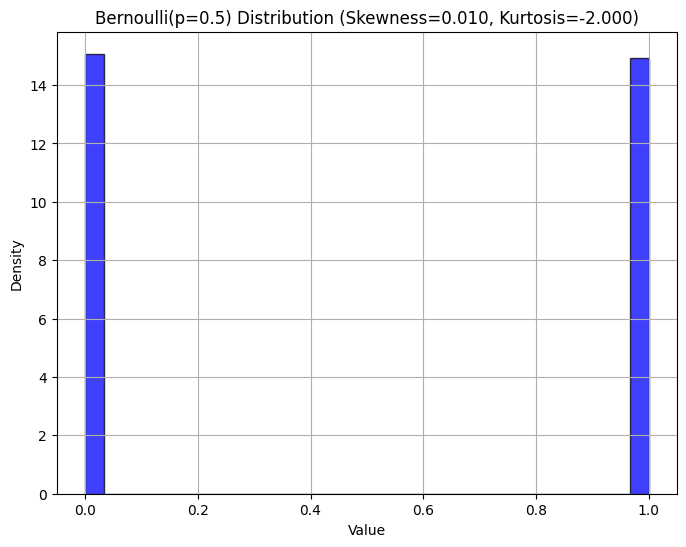

In [53]:
# Пример с Бернулли
bernoulli_data = bernoulli(0.5, 10000)
compute_and_plot_distribution_stats(bernoulli_data, "Bernoulli(p=0.5)")

Binomial(n=10, p=0.5) - Aсимметрия: 0.018, Эксцесс: -0.229


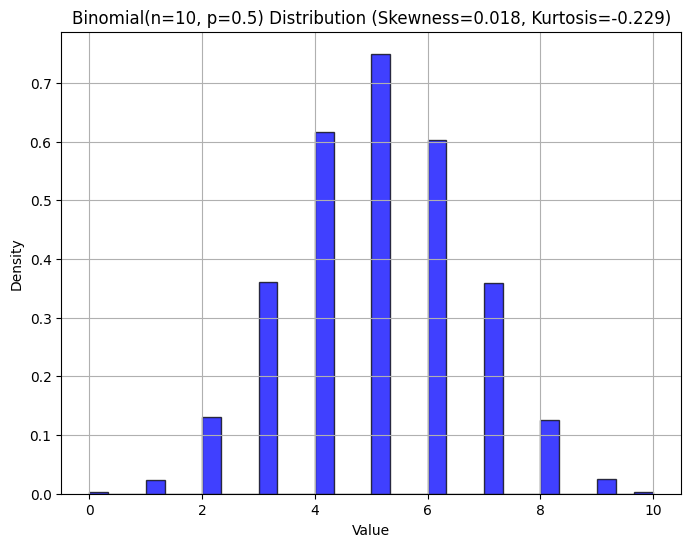

In [54]:
# Пример с биномиальным распределением
binomial_data = binomial(10, 0.5, 10000)
compute_and_plot_distribution_stats(binomial_data, "Binomial(n=10, p=0.5)")

Normal(a=0, σ=1) - Aсимметрия: -0.025, Эксцесс: 0.139


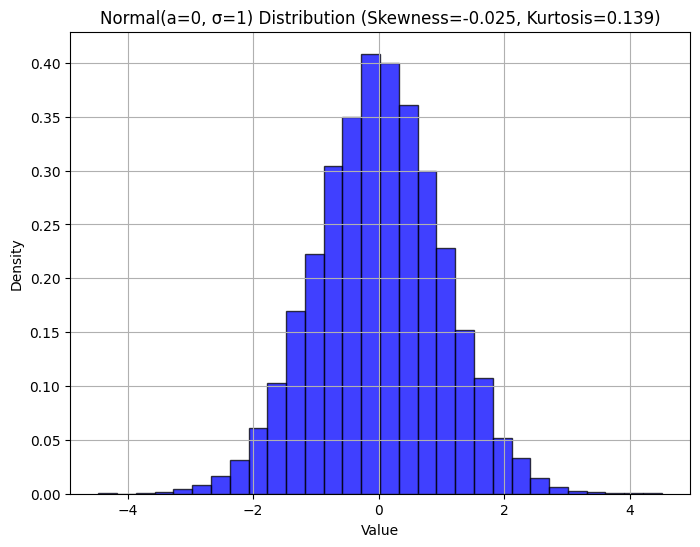

In [55]:
# Пример с нормальным распределением
normal_data = normal(0, 1, 10000)
compute_and_plot_distribution_stats(normal_data, "Normal(a=0, s=1)")

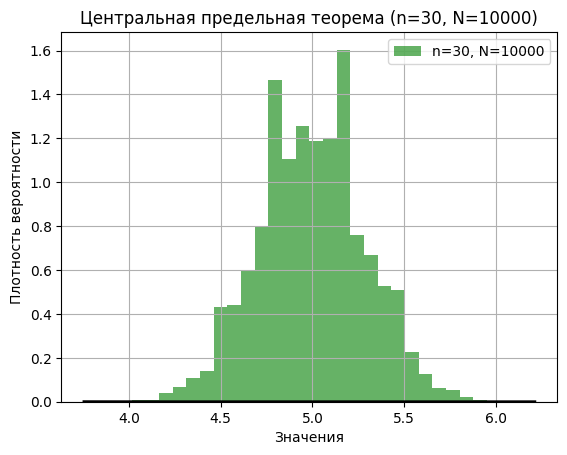

In [12]:
def central_limit_theorem(n, N):
    sample_means = []
    
    for _ in range(N):
        samples = binomial(10, 0.5, n)
        
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label=f'n={n}, N={N}')
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, 0, 1)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Центральная предельная теорема (n={n}, N={N})')
    plt.xlabel('Значения')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()


n = 30  # Размер выборки
N = 10000  # Количество выборок

central_limit_theorem(n, N)